In [5]:
%pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [13]:
import polars as pl
from toolz import pipe
import requests, zipfile, io

# Lecture 4.2 - Download and unzip files programmically.

In this lecture, we will

1. Create a list of URLs using `f`-strings,
2. Use `requests` or `wget` to download each zipped CSV, and
3. Use the `zipfile` module to unzip each file, and

### REVIEW - `f-strings`

An `f-string`
- Syntax`f"..."`
- Evaluate code inside `{...}`




#### Example 1 - Variable

In [14]:
names = ["silas", "ella", "tisha", "todd", "april", "chris"]

(phrase :=
 [f"{name} is cool!"
  for name in names]
)

['silas is cool!',
 'ella is cool!',
 'tisha is cool!',
 'todd is cool!',
 'april is cool!',
 'chris is cool!']

#### Example 2 - Expressions

In [15]:
names = ["silas", "ella", "tisha", "todd", "april", "chris"]

(phrase :=
 [f"{name.title()} is {'not cool' if name == 'silas' else 'cool'}!"
  for name in names
 ]
)


['Silas is not cool!',
 'Ella is cool!',
 'Tisha is cool!',
 'Todd is cool!',
 'April is cool!',
 'Chris is cool!']

#### Example 3 - Categorize with a `dict`

In [16]:
facts = {"Silas" : "tall",
         "Ella"  : "new",
         "Tisha" : "a volleyball fan",
         "Todd"  : "a lover of coding",
         "April" : "in a band",
         "Chris" : "funny",
        }

(phrase :=
 [f"{name.title()} is {fact}!"
  for name, fact in facts.items()]
)


['Silas is tall!',
 'Ella is new!',
 'Tisha is a volleyball fan!',
 'Todd is a lover of coding!',
 'April is in a band!',
 'Chris is funny!']

## Creating paths using `f-strings` and `list comprehensions`

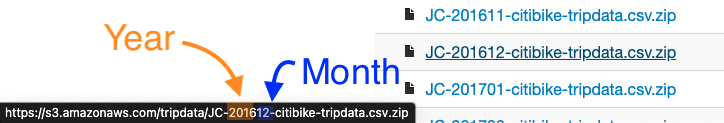

Consider CSV from https://s3.amazonaws.com/tripdata/index.html starting with `JC`.
1. Format is `"https://s3.amazonaws.com/tripdata/JC-{year}{month}-citibike-tripdata.csv.zip"`
2. First focus on 2016 all months




#### Step 1a - Get a list of month numbers

In [17]:
(month_num :=
 [i for i in range(1, 13)
 ]
)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#### Step 1b - Pad the months with a zero as needed

In [18]:
maybe_pad_month = lambda n: f"0{n}" if n < 10 else f"{n}"

(month_str :=
 [maybe_pad_month(n)
 for n in month_num
 ]
)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

#### Step 2 - Use an `f-string` + a `list` comprehension to make all URLs

In [19]:
(urls :=
 [f"https://s3.amazonaws.com/tripdata/JC-2016{month}-citibike-tripdata.csv.zip"
  for month in months
 ]
)

NameError: name 'months' is not defined

#### Step 3 - Use `toolz.pipe` to combine steps

In [20]:
maybe_pad_month = lambda n: f"0{n}" if n < 10 else f"{n}"

(urls :=
 pipe(range(1, 13),
      lambda L: [maybe_pad_month(n) 
                 for n in L
                ],
      lambda L:  [f"https://s3.amazonaws.com/tripdata/JC-2016{month}-citibike-tripdata.csv.zip"
                   for month in L
                 ],
 )

)

['https://s3.amazonaws.com/tripdata/JC-201601-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201602-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201603-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201604-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201605-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201606-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201607-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201608-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201609-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201610-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201611-citibike-tripdata.csv.zip',
 'https://s3.amazonaws.com/tripdata/JC-201612-citibike-tripdata.csv.zip']

## Downloading files programmically

1. Use `requests` to download (static) link,
2. Use a `try`/`except` statement $\longrightarrow$ Requires `for` loop.
3. Use `print` to track progress and identify errors.

```
import requests, zipfile, io

for url in urls:
    try:
        print(f"Downloading {url}\n\n")
        r = requests.get(url)
        print(f"Unzipping {url}\n\n")
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(f"./data")
        print(f"Successfully downloaded and unzipped {url}\n\n")
    except Exception as e:
        print(f"Problem downloading and unzipping {url}\n\n")
        assert r.ok, f"Error in get: {r.status}\n\n"
```



In [21]:
import requests, zipfile, io # Put at the top of the notebook!

In [22]:
for url in urls:
    try:
        print(f"Downloading {url}")
        r = requests.get(url)
        print(f"Unzipping {url}")
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(f"./data")
        print(f"Successfully downloaded and unzipped {url}\n\n")
    except Exception as e:
        print(f"Problem downloading and unzipping {url}\n\n")
        assert r.ok, f"Error in get: {r.status}"

Unzipping https://s3.amazonaws.com/tripdata/JC-201601-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201601-citibike-tripdata.csv.zip


Unzipping https://s3.amazonaws.com/tripdata/JC-201602-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201602-citibike-tripdata.csv.zip


Unzipping https://s3.amazonaws.com/tripdata/JC-201603-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201603-citibike-tripdata.csv.zip


Unzipping https://s3.amazonaws.com/tripdata/JC-201604-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201604-citibike-tripdata.csv.zip


Unzipping https://s3.amazonaws.com/tripdata/JC-201605-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201605-citibike-tripdata.csv.zip


Unzipping https://s3.amazonaws.com/tripdata/JC-201606-c

## <font color="red"> Exercise 4.2 - Download and unzip all `JC` files for all years </font>

**Tasks.**
1. Use a comprehension to make a list paths for all the `JC...` files, and
2. Download and unzip each.

**HINTS.**

1. Use a comprehension with a double loop to combine all years, and
2. Add a `filter` to remove excess paths for some years.

```
# Basic "shape"
(all_paths :=
 [ ...               # f-string to insert both year and month (zero padded)
   for year in ...   # Use `range` for all years
   for month in ...  # Use `range` for all months
   if ...            # Only keep existing month/year combos
 ]
)
```

In [23]:
import requests, zipfile, io

urls = [
    f"https://s3.amazonaws.com/tripdata/JC-{year}{month:02d}-citibike-tripdata.csv.zip"
    for year in range(2016, 2017)   
    for month in range(1, 13)      
]

print(f"Generated {len(urls)} URLs")
print(urls[:3]) 

for url in urls:
    try:
        print(f"Downloading {url}")
        r = requests.get(url)
        r.raise_for_status()
        
        print(f"Unzipping {url}")
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall("./data")
        
        print(f"Successfully downloaded and unzipped {url}\n")
    except Exception as e:
        print(f"Problem downloading and unzipping {url}: {e}\n")


Generated 12 URLs
['https://s3.amazonaws.com/tripdata/JC-201601-citibike-tripdata.csv.zip', 'https://s3.amazonaws.com/tripdata/JC-201602-citibike-tripdata.csv.zip', 'https://s3.amazonaws.com/tripdata/JC-201603-citibike-tripdata.csv.zip']
Unzipping https://s3.amazonaws.com/tripdata/JC-201601-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201601-citibike-tripdata.csv.zip

Unzipping https://s3.amazonaws.com/tripdata/JC-201602-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201602-citibike-tripdata.csv.zip

Unzipping https://s3.amazonaws.com/tripdata/JC-201603-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201603-citibike-tripdata.csv.zip

Unzipping https://s3.amazonaws.com/tripdata/JC-201604-citibike-tripdata.csv.zip
Successfully downloaded and unzipped https://s3.amazonaws.com/tripdata/JC-201604-citibike-tripdata.csv.zip

Unzipping 